Loading crime data...

Loaded 19,119 crime incidents

Aggregating to daily crime counts...

Aggregated 1461 days.

Creating visualization...

Visualization complete!

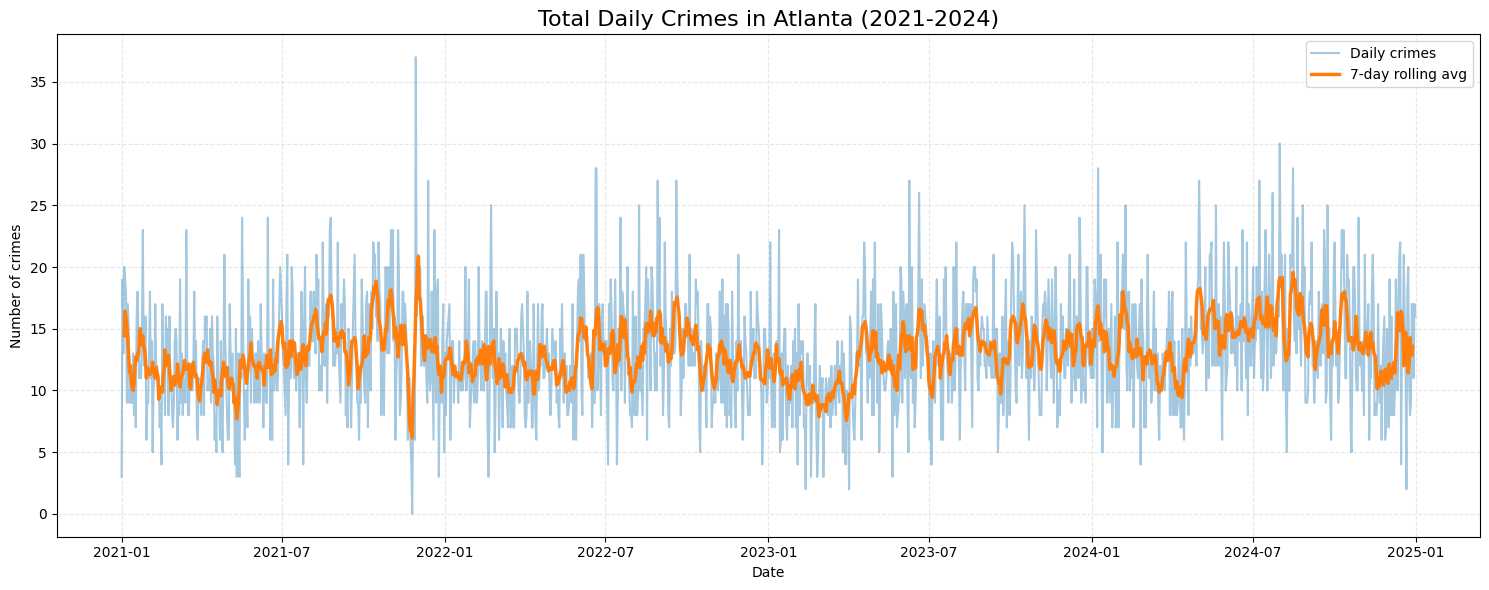

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from rich.console import Console

# --- 0. Setup ---
console = Console()

# --- 1. LOAD DATA ---
console.print("Loading crime data...", style="bold blue")
crime_csv_path = "/workspaces/campus-burglary-risk-prediction/data/november_eda/pina_cleaned/current/cleaned_full_atl_v8.csv"
df = pd.read_csv(crime_csv_path)

# Convert ReportDate to datetime
df['ReportDate'] = pd.to_datetime(df['ReportDate'])
df = df.sort_values('ReportDate')

console.print(f"Loaded {len(df):,} crime incidents", style="green")

# --- 2. AGGREGATE TO DAILY COUNTS ---
console.print("Aggregating to daily crime counts...", style="bold blue")

# Group by the date component
daily_counts = df.groupby(df['ReportDate'].dt.date).size().reset_index(name='crime_count')
daily_counts['ReportDate'] = pd.to_datetime(daily_counts['ReportDate'])

# Create complete date range (fill missing dates with 0)
date_range = pd.date_range(start=daily_counts['ReportDate'].min(), 
                           end=daily_counts['ReportDate'].max(), 
                           freq='D')
daily_counts = daily_counts.set_index('ReportDate').reindex(date_range, fill_value=0)
daily_counts = daily_counts.reset_index().rename(columns={'index': 'date'})

console.print(f"Aggregated {len(daily_counts)} days.", style="green")

# --- 3. CALCULATE 7-DAY ROLLING AVERAGE ---
# We use center=True to make the average line up nicely in the middle of its window
daily_counts['rolling_avg'] = daily_counts['crime_count'].rolling(window=7, center=True).mean()

# --- 4. CREATE VISUALIZATION ---
console.print("Creating visualization...", style="bold blue")
plt.figure(figsize=(15, 6))

# Plot Daily crimes
plt.plot(daily_counts['date'], daily_counts['crime_count'], 
         label='Daily crimes', 
         color='tab:blue', 
         alpha=0.4) # Light and thin

# Plot 7-day rolling avg
plt.plot(daily_counts['date'], daily_counts['rolling_avg'], 
         label='7-day rolling avg', 
         color='tab:orange', 
         linewidth=2.5) # Thicker and solid

# --- 5. STYLING ---
plt.title('Total Daily Crimes in Atlanta (2021-2024)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of crimes')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

console.print("Visualization complete!", style="bold green")
plt.show()

Loading crime data...

Loaded 19,119 crime incidents

Aggregating to hourly crime counts...

/tmp/ipykernel_176867/1051013306.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_counts = df.groupby(df['ReportDate'].dt.floor('H')).size().reset_index(name='crime_count')
/tmp/ipykernel_176867/1051013306.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=hourly_counts['date'].min(),


Aggregated 35,047 hours.

Calculating 168-hour rolling average...

Creating visualization...

Visualization complete!

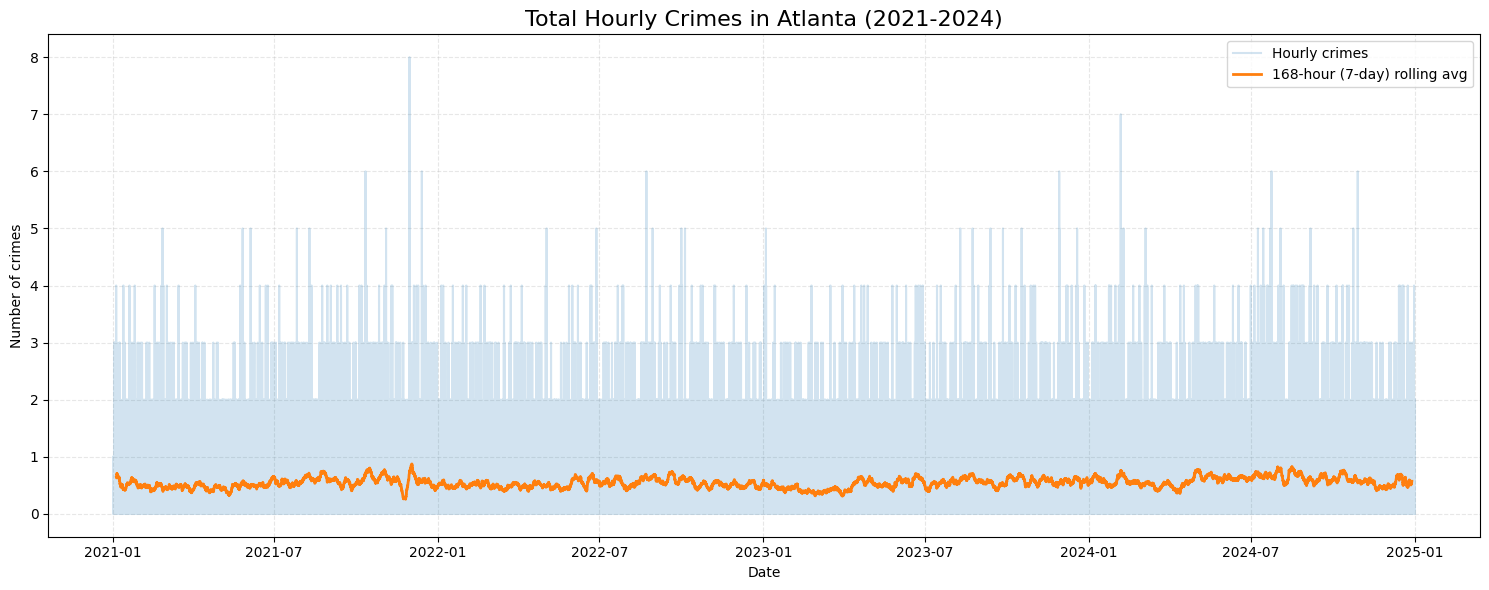

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from rich.console import Console

# --- 0. Setup ---
console = Console()

# --- 1. LOAD DATA ---
console.print("Loading crime data...", style="bold blue")
crime_csv_path = "/workspaces/campus-burglary-risk-prediction/data/november_eda/pina_cleaned/current/cleaned_full_atl_v8.csv"
df = pd.read_csv(crime_csv_path)

# Convert ReportDate to datetime
df['ReportDate'] = pd.to_datetime(df['ReportDate'])
df = df.sort_values('ReportDate')

console.print(f"Loaded {len(df):,} crime incidents", style="green")

# --- 2. AGGREGATE TO HOURLY COUNTS ---
console.print("Aggregating to hourly crime counts...", style="bold blue")

# Group by the hour
hourly_counts = df.groupby(df['ReportDate'].dt.floor('H')).size().reset_index(name='crime_count')
hourly_counts = hourly_counts.rename(columns={'ReportDate': 'date'})

# Create complete HOURLY date range (fill missing hours with 0)
date_range = pd.date_range(start=hourly_counts['date'].min(), 
                           end=hourly_counts['date'].max(), 
                           freq='H')
hourly_counts = hourly_counts.set_index('date').reindex(date_range, fill_value=0)
hourly_counts = hourly_counts.reset_index().rename(columns={'index': 'date'})

console.print(f"Aggregated {len(hourly_counts):,} hours.", style="green")

# --- 3. CALCULATE 168-HOUR (7-DAY) ROLLING AVERAGE ---
window_size = 24 * 7 # 168 hours
console.print(f"Calculating {window_size}-hour rolling average...", style="dim")
hourly_counts['rolling_avg'] = hourly_counts['crime_count'].rolling(window=window_size, center=True).mean()

# --- 4. CREATE VISUALIZATION ---
console.print("Creating visualization...", style="bold blue")
plt.figure(figsize=(15, 6))

# Plot Hourly crimes (very light, as it will be noisy)
plt.plot(hourly_counts['date'], hourly_counts['crime_count'], 
         label='Hourly crimes', 
         color='tab:blue', 
         alpha=0.2) 

# Plot rolling avg
plt.plot(hourly_counts['date'], hourly_counts['rolling_avg'], 
         label='168-hour (7-day) rolling avg', 
         color='tab:orange', 
         linewidth=2) # Solid and visible

# --- 5. STYLING ---
plt.title('Total Hourly Crimes in Atlanta (2021-2024)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of crimes')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

console.print("Visualization complete!", style="bold green")
plt.show()

In [2]:
import plotly.express as px
import pandas as pd
from rich.console import Console

# --- 0. Setup ---
console = Console()

# This is the final, fully-enriched file you created
final_csv_path = "/workspaces/campus-burglary-risk-prediction/data/november_eda/pina_cleaned/current/cleaned_full_atl_v8.csv"

# --- 1. Load the final dataset ---
console.print(f"Loading final data from [cyan]{final_csv_path}[/cyan]...", style="bold blue")
try:
    df = pd.read_csv(final_csv_path)
except FileNotFoundError:
    console.print(f"Error: File not found at {final_csv_path}", style="bold red")
    console.print("Please ensure you have run the NPU join script.", style="dim")
    exit()

# --- 2. Bar Chart: Crime by NPU ---
console.print("Generating NPU bar chart...", style="bold blue")
# Get counts (ignoring NaNs, which are non-Atlanta locations)
npu_counts = df['npu_label'].dropna().value_counts().reset_index()
npu_counts.columns = ['npu_label', 'count']

fig_npu = px.bar(
    npu_counts.sort_values('count', ascending=False), 
    x='npu_label', 
    y='count',
    title='Crime Incident Count by NPU',
    labels={'npu_label': 'NPU', 'count': 'Incident Count'}
)
fig_npu.show()

# --- 3. Bar Chart: Crime by Zone ---
console.print("Generating Zone bar chart...", style="bold blue")
# Get counts (no NaNs left in this column)
zone_counts = df['Zone_int_cleaned'].value_counts().reset_index()
zone_counts.columns = ['Zone_int_cleaned', 'count']
# Convert zones to string labels for better plotting
zone_counts['Zone_int_cleaned'] = 'Zone ' + zone_counts['Zone_int_cleaned'].astype(int).astype(str)

fig_zone = px.bar(
    zone_counts.sort_values('Zone_int_cleaned'), 
    x='Zone_int_cleaned', 
    y='count',
    title='Crime Incident Count by Zone',
    labels={'Zone_int_cleaned': 'Zone', 'count': 'Incident Count'}
)
fig_zone.show()

# --- 4. Sunburst: Zone -> NPU Hierarchy ---
console.print("Generating Zone/NPU Sunburst chart...", style="bold blue")
# Drop all rows that don't have *both* a Zone and NPU
df_for_sunburst = df.dropna(subset=['Zone_int_cleaned', 'npu_label'])

# Convert zone to a string label
df_for_sunburst['Zone_int_cleaned'] = 'Zone ' + df_for_sunburst['Zone_int_cleaned'].astype(int).astype(str)

fig_sunburst = px.sunburst(
    df_for_sunburst, 
    path=['Zone_int_cleaned', 'npu_label'], # Define the hierarchy
    title='Hierarchy of Crime: Zone to NPU'
)
fig_sunburst.show()

console.print("All visualizations generated.", style="bold green")

Loading final data from 
/workspaces/campus-burglary-risk-prediction/data/november_eda/pina_cleaned/current/cleaned_full_atl_v8.csv...

Generating NPU bar chart...

Generating Zone bar chart...

Generating Zone/NPU Sunburst chart...

All visualizations generated.